<a href="https://colab.research.google.com/github/melanieyes/regression/blob/main/Softmax_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Softmax Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **One Sample**

In [ ]:
X = np.array([
    [0.5],
    [1.0],
    [1.5],
    [2.0],
    [2.5],
    [3.0],
    [3.5],
    [4.0],
])
Y = np.array([0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

n_classes = 2
Y_onehot = convert_one_hot(Y, n_classes)

In [ ]:
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [ ]:
X, Y_onehot

(array([[1. , 0.5],
        [1. , 1. ],
        [1. , 1.5],
        [1. , 2. ],
        [1. , 2.5],
        [1. , 3. ],
        [1. , 3.5],
        [1. , 4. ]]),
 array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [ ]:
x = X[0].reshape((2,1))
y = Y_onehot[0].reshape((2,1))
x, y

(array([[1. ],
        [0.5]]),
 array([[1.],
        [0.]]))

In [ ]:
theta = np.array([[0.1, 0.2], [0.3, 0.4]])
theta

array([[0.1, 0.2],
       [0.3, 0.4]])

In [ ]:
# define softmax function
def softmax_function(z):
    return np.exp(z) / np.sum(np.exp(z))

In [ ]:
# compute y_hat
def predict(x, theta):
    z = theta.T.dot(x)
    y_hat = softmax_function(z)
    return z, y_hat

z, y_hat = predict(x, theta)
z, y_hat

(array([[0.25],
        [0.4 ]]),
 array([[0.46257015],
        [0.53742985]]))

In [ ]:
# compute loss
def compute_loss(y_hat, y):
    loss = -np.log(y.T.dot(y_hat))
    return loss

loss = compute_loss(y_hat, y)
loss

array([[0.77095705]])

In [ ]:
# compute gradient
def compute_gradient(y_hat, y, x):
    gradient = x.dot((y_hat - y).T)
    return gradient

gradient = compute_gradient(y_hat, y, x)
gradient

array([[-0.53742985,  0.53742985],
       [-0.26871492,  0.26871492]])

In [ ]:
# update weights
learning_rate = 0.01

def update_weight(theta, gradient, learning_rate):
    theta -= (learning_rate * gradient)
    return theta

theta = update_weight(theta, gradient, learning_rate)
theta

array([[0.1053743 , 0.1946257 ],
       [0.30268715, 0.39731285]])

In [ ]:
z, y_hat = predict(x, theta)
z, y_hat

(array([[0.25671787],
        [0.39328213]]),
 array([[0.4659119],
        [0.5340881]]))

In [ ]:
loss = compute_loss(y_hat, y)
loss

array([[0.76375872]])

### **Training**

In [ ]:
theta = np.array([[0.1, 0.2], [0.3, 0.4]])
learning_rate = 0.1
n_epochs = 20
n_samples = X.shape[0]

losses = []
for epoch in range(n_epochs):
    for i in range(n_samples):
        xi = X[i]
        yi = Y_onehot[i]

        xi = xi.reshape((2,1))
        yi = yi.reshape((2,1))

        # compute z, y_hat
        z, y_hat = predict(x, theta)

        # compute loss
        loss = compute_loss(y_hat, y)
        losses.append(loss[0])

        # compute gradient
        gradient = compute_gradient(y_hat, y, x)

        # update weight
        theta = update_weight(theta, gradient, learning_rate)

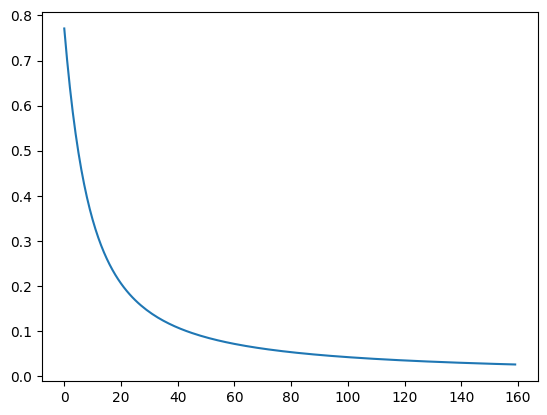

In [ ]:
plt.plot(losses)
plt.show()

**Prediction**

In [ ]:
x_test = np.array([1.0, 0.25]).reshape((2,1))
z, y_hat = predict(x_test, theta)
pred = np.argmax(y_hat)
pred

0

In [ ]:
z, y_hat

(array([[ 1.87308086],
        [-1.39808086]]),
 array([[0.96342613],
        [0.03657387]]))

In [ ]:
theta

array([[ 1.60940521, -1.30940521],
       [ 1.0547026 , -0.3547026 ]])

## **Batch Sample**

In [ ]:
X, Y_onehot

(array([[1. , 0.5],
        [1. , 1. ],
        [1. , 1.5],
        [1. , 2. ],
        [1. , 2.5],
        [1. , 3. ],
        [1. , 3.5],
        [1. , 4. ]]),
 array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [ ]:
theta = np.array([[0.1, 0.2], [0.3, 0.4]])
theta

array([[0.1, 0.2],
       [0.3, 0.4]])

In [ ]:
X.shape

(8, 2)

In [ ]:
# define softmax function
def softmax_function(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

In [ ]:
# compute y_hat
def predict(x, theta):
    z = x.dot(theta)
    y_hat = softmax_function(z)
    return z, y_hat

z, y_hat = predict(X, theta)
z, y_hat

(array([[0.25, 0.4 ],
        [0.4 , 0.6 ],
        [0.55, 0.8 ],
        [0.7 , 1.  ],
        [0.85, 1.2 ],
        [1.  , 1.4 ],
        [1.15, 1.6 ],
        [1.3 , 1.8 ]]),
 array([[0.46257015, 0.53742985],
        [0.450166  , 0.549834  ],
        [0.4378235 , 0.5621765 ],
        [0.42555748, 0.57444252],
        [0.41338242, 0.58661758],
        [0.40131234, 0.59868766],
        [0.38936077, 0.61063923],
        [0.37754067, 0.62245933]]))

In [ ]:
# compute loss
def compute_loss(y_hat, y):
    loss = -np.log(np.sum(y_hat*y, axis=1))
    return loss

loss = compute_loss(y_hat, Y_onehot)
loss

array([0.77095705, 0.79813887, 0.57593942, 0.85435524, 0.88338216,
       0.51301525, 0.49324895, 0.47407698])

In [ ]:
# compute gradient
def compute_gradient(y_hat, y, x):
    gradient = x.T.dot(y_hat - y)
    return gradient

gradient = compute_gradient(y_hat, Y_onehot, X)
gradient

array([[-0.64228666,  0.64228666],
       [ 1.29961972, -1.29961972]])

In [ ]:
# update weights
learning_rate = 0.01

def update_weight(theta, gradient, learning_rate):
    theta -= (learning_rate * gradient)
    return theta

theta = update_weight(theta, gradient, learning_rate)
theta

array([[0.10642287, 0.19357713],
       [0.2870038 , 0.4129962 ]])

### Training

In [ ]:
theta = np.random.rand(2,2)
learning_rate = 0.01
n_epochs = 500
n_samples = X.shape[0]

losses = []
for epoch in range(n_epochs):
    # compute z, y_hat
    z, y_hat = predict(X, theta)

    # compute loss
    loss = compute_loss(y_hat, Y_onehot)
    losses.append(np.sum(loss))

    # compute gradient
    gradient = compute_gradient(y_hat, Y_onehot, X)

    # update weight
    theta = update_weight(theta, gradient, learning_rate)

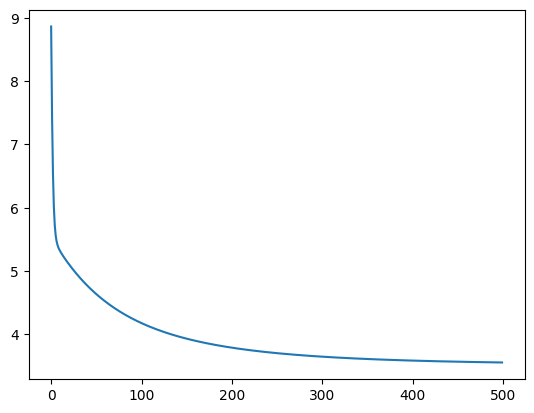

In [ ]:
plt.plot(losses)
plt.show()